# Импорт библиотек, загрузка данных и общие сведения о данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [16]:
calls = pd.read_excel("/content/drive/MyDrive/calls.xlsx")


In [17]:
calls.head()

,subs_id,b_number,call_start,duration_sec,direction
0,103648,134753,2023-07-06 09:42:00,4,outgoing
1,138421,108982,2023-07-02 05:08:00,25,outgoing
2,128120,136528,2023-07-14 08:25:00,74,outgoing
3,123503,120077,2023-07-12 21:19:00,12,outgoing
4,103214,102238,2023-07-11 20:03:00,119,outgoing


In [18]:
calls.shape

(525000, 5)

In [23]:
location = pd.read_excel("/content/drive/MyDrive/location.xlsx")


In [24]:
location.head()

,subs_id,timestamp,lat,lon
0,104691,2023-07-12 13:44:00,51.172952,71.487984
1,143420,2023-07-15 14:47:00,51.152047,71.483807
2,129760,2023-07-01 08:11:00,51.123342,71.474190
3,115541,2023-07-07 05:57:00,51.163725,71.484300
4,147618,2023-07-02 03:07:00,51.143256,71.470337


In [25]:
location.shape

(721000, 4)

In [27]:
subs = pd.read_excel("/content/drive/MyDrive/subs.xlsx")

In [28]:
subs.head()

,subs_id,region,sim_activation_date,churn_flag
0,100000,Almaty,2023-04-13,0
1,100001,Shymkent,2023-12-15,0
2,100002,Almaty,2023-09-28,0
3,100003,Shymkent,2023-04-17,0
4,100004,Astana,2023-03-13,0


In [29]:
subs.shape

(50000, 4)

In [30]:
calls.isnull().sum()

,0
subs_id,0
b_number,0
call_start,0
duration_sec,0
direction,0


In [31]:
subs.isnull().sum()

,0
subs_id,0
region,0
sim_activation_date,0
churn_flag,0


In [32]:
location.isnull().sum()

,0
subs_id,0
timestamp,0
lat,0
lon,0


In [33]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525000 entries, 0 to 524999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subs_id       525000 non-null  int64         
 1   b_number      525000 non-null  int64         
 2   call_start    525000 non-null  datetime64[ns]
 3   duration_sec  525000 non-null  int64         
 4   direction     525000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 20.0+ MB


In [34]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721000 entries, 0 to 720999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   subs_id    721000 non-null  int64         
 1   timestamp  721000 non-null  datetime64[ns]
 2   lat        721000 non-null  float64       
 3   lon        721000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 22.0 MB


In [35]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subs_id              50000 non-null  int64         
 1   region               50000 non-null  object        
 2   sim_activation_date  50000 non-null  datetime64[ns]
 3   churn_flag           50000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ MB


# EDA

Абонентов по регионам:
 region
Almaty       12556
Shymkent     12503
Astana       12472
Karaganda    12469
Name: count, dtype: int64

Общий уровень оттока: 10.2%

Отток по регионам:
 region
Karaganda    10.9%
Almaty       10.0%
Astana       10.0%
Shymkent     10.0%
Name: churn_flag, dtype: object


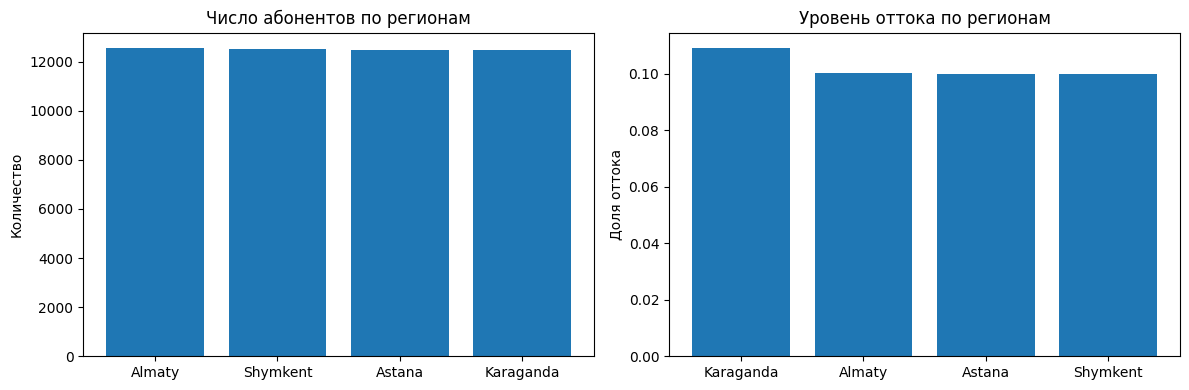

In [41]:
region_counts = subs['region'].value_counts()
print("Абонентов по регионам:\n", region_counts)

overall_churn_rate = subs['churn_flag'].mean()
print(f"\nОбщий уровень оттока: {overall_churn_rate:.1%}")

churn_by_region = subs.groupby('region')['churn_flag'].mean().sort_values(ascending=False)
print("\nОтток по регионам:\n", churn_by_region.apply(lambda x: f"{x:.1%}"))

fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].bar(region_counts.index, region_counts.values)
axes[0].set_title('Число абонентов по регионам')
axes[0].set_ylabel('Количество')

axes[1].bar(churn_by_region.index, churn_by_region.values)
axes[1].set_title('Уровень оттока по регионам')
axes[1].set_ylabel('Доля оттока')

plt.tight_layout()
plt.show()


Все абоненты из 4 крупнейних городов Казахстана, и так же уровень оттока одинаковых. Данные распределены по регионам равномерно по 12 тысяч около

count    50000.000000
mean        14.420000
std          3.919299
min          2.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         33.000000
Name: loc_records, dtype: float64


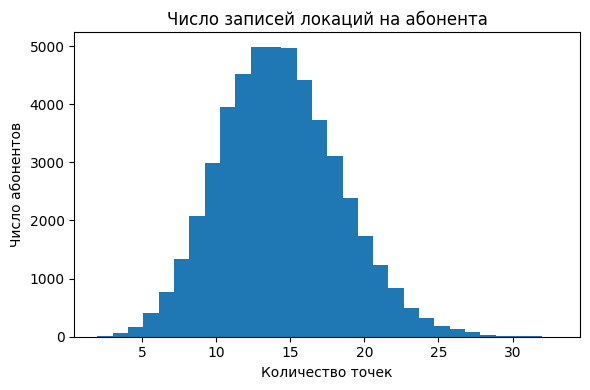

Топ-10 по числу точек локации:
 subs_id
124573    33
133332    33
130141    32
115039    31
125427    31
127108    31
132345    31
133997    31
148961    31
109709    30
Name: loc_records, dtype: int64
Пример первых 5 домашних точек:
    subs_id        lat        lon
0   100000  51.128193  71.488087
1   100001  51.130663  71.479258
2   100002  51.107495  71.512415
3   100003  51.139591  71.454428
4   100004  51.155753  71.476060


In [43]:
loc_counts = location.groupby('subs_id').size().rename('loc_records')
print(loc_counts.describe())

plt.figure(figsize=(6,4))
plt.hist(loc_counts, bins=30)
plt.title('Число записей локаций на абонента')
plt.xlabel('Количество точек')
plt.ylabel('Число абонентов')
plt.tight_layout()
plt.show()

top_locators = loc_counts.nlargest(10)
print("Топ-10 по числу точек локации:\n", top_locators)

if {'latitude','longitude'}.issubset(location.columns):
    plt.figure(figsize=(6,6))
    plt.scatter(location['longitude'], location['latitude'],
                s=1, alpha=0.3)
    plt.title('Scatter-plot всех точек локации')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

home_point = (
    location
    .groupby(['subs_id','lat','lon'])
    .size()
    .rename('cnt')
    .reset_index()
    .sort_values(['subs_id','cnt'], ascending=[True,False])
    .groupby('subs_id')
    .first()
    .reset_index()
    .loc[:, ['subs_id','lat','lon']]
)
print("Пример первых 5 домашних точек:\n", home_point.head())

# Что делает этот блок:

# Смотрим, сколько геоточек в среднем и в разбросе по абонентам.

# Выявляем «многоточечников» — кто наиболее подвижен.

# Если есть latitude/longitude, рисуем общий scatter-plot для понимания географии покрытия.

# Находим для каждого subs_id «домашнюю» точку как наиболее частую пару (lat, lon) — аналогично моду по cell_id.

Число записей локаций на абонента распределено почти нормально, со средним около 14 15 точек. Большинство пользователей имеет от 10 до 20 записей что говорит о равномерности данных.
 Хвосты распределения (меньше 5 или больше 30 записей) встречаютя редко и могут свидетельствовать либо об аномальных случаях, либо о технических особенностях данных

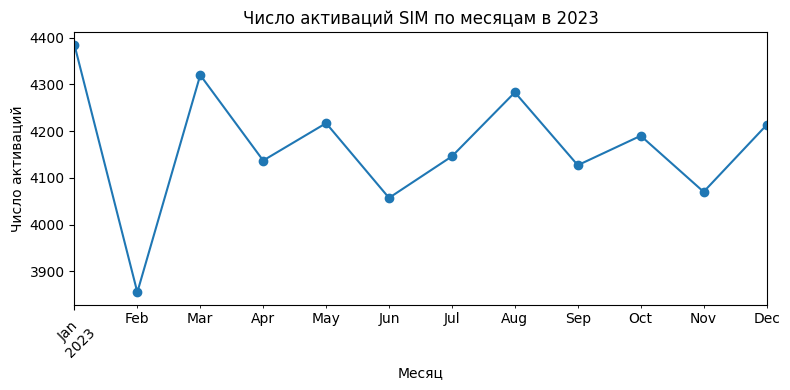

In [42]:

subs['sim_activation_date'] = pd.to_datetime(subs['sim_activation_date'])

activations_month = subs['sim_activation_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(8,4))
activations_month.plot(kind='line', marker='o')
plt.title('Число активаций SIM по месяцам в 2023')
plt.xlabel('Месяц')
plt.ylabel('Число активаций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Анализ динамики активаций SIM показывает выраженную сезонность. Пик в январе связан с новогодними подарками, а также корпоративными закупками. В марте наблюдается рост, вероятно, за счет праздничныз подарков на 8 марта. В августе фиксируется всплеск связанный с подготовкой к учебному году. В декабре рост объясняется сезонными покупакми перед НГ и закрытием корпоративных планов (и премий)

In [44]:
calls_agg = (
    calls
    .groupby('subs_id')
    .agg(
        call_count=('subs_id', 'count'),
        total_call_duration=('duration_sec', 'sum'),
        unique_callees=('subs_id', 'nunique')
    )
    .reset_index()
    .rename(columns={'subs_id': 'subs_id'})
)
loc_agg = (
    location
    .groupby('subs_id')
    .size()
    .reset_index(name='loc_count')
)
activity = (
    subs[['subs_id', 'churn_flag']]
    .merge(calls_agg, on='subs_id', how='left')
    .merge(loc_agg,  on='subs_id', how='left')
    .fillna(0)
)

activity.head(5)


,subs_id,churn_flag,call_count,total_call_duration,unique_callees,loc_count
0,100000,0,6.0,518.0,1.0,13
1,100001,0,13.0,1727.0,1.0,14
2,100002,0,8.0,942.0,1.0,14
3,100003,0,21.0,2416.0,1.0,13
4,100004,0,11.0,1345.0,1.0,4


<Figure size 600x400 with 0 Axes>

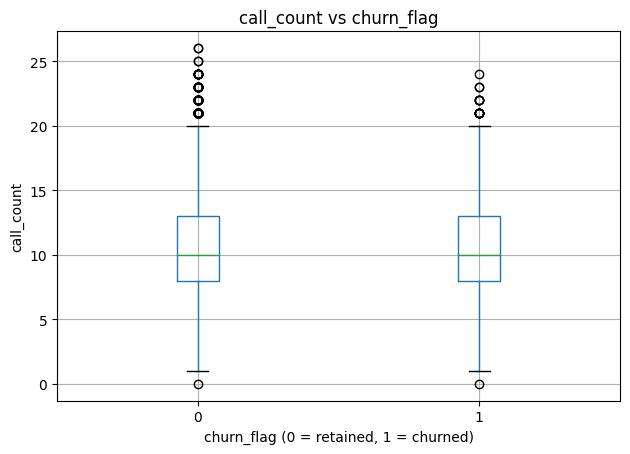

<Figure size 600x400 with 0 Axes>

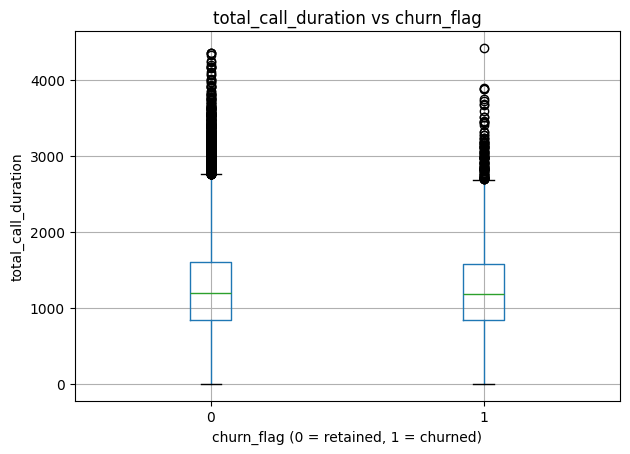

<Figure size 600x400 with 0 Axes>

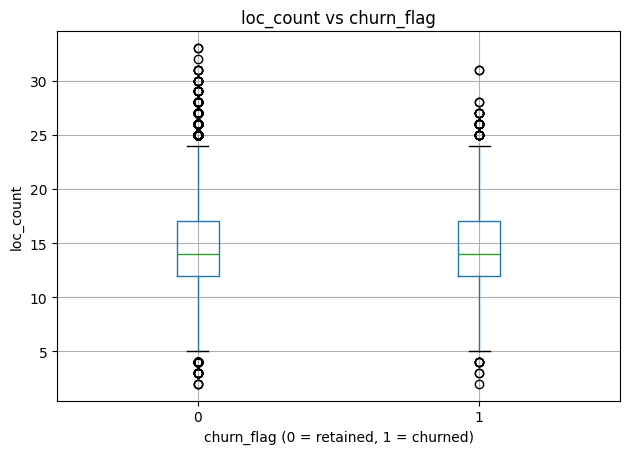

In [46]:
features = ['call_count', 'total_call_duration', 'loc_count']

for feat in features:
    plt.figure(figsize=(6,4))
    activity.boxplot(column=feat, by='churn_flag')
    plt.title(f'{feat} vs churn_flag')
    plt.suptitle('')
    plt.xlabel('churn_flag (0 = retained, 1 = churned)')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


1 Boxplot
Анализ количества звонков у абонентов, покинувших оператора и оставшихся показал схожее распределении: медианнное значение 10, а межквартальный размах находится в пределах 8-13 звонков. Это указывает на то, что только по количесвтву звонков сложно прогнозировать уход абонента. Однако заметны выбросы - как в сторону низкой активности (почти нулевые звонки), так и высокой (20+ звонков), что может служить дополнительными индикаторами в комплексной модели
2 Boxplot

---


На этом плоте так же очень схожи. Медианной количество общая продолжительность звонков 1200 секунд,межквартальный размах находится в пределах от 900 секунд до 1700 секунд. Прогнозировать здесь будет сложно. Паттернов оттоква почти нет. Видно что аномальное продолжительность есть у оставшихся клиентов больше чем у утекших.

---


3 Boxplot
Медианной количество локаций абонентов 14. Межквартальный размах от 12 до 17. Аномалий > 24 больше у оставшихся абонентов чем у утекших.

# Гипотезы

Гипотеза 1. «Домашняя» локация совпадает
Суть: члены семьи чаще всего находятся дома в одной и той же точке (lat/lon или cell_id).
Проверка:

Для каждого subs_id вычислить «домашнюю» точку как наиболее частую пару (latitude, longitude) или mode от cell_id.

Построить группы по этому признаку: все абоненты с одинаковой «домашней» точкой → candidate family.

Оценить, как часто идентичные точки появляются у разных subs_id: число групп и их размеры.

Сравнить плотность внутренних звонков в таких группах (гипотеза 2) с чистыми случайными наборами.

In [56]:
location['timestamp'] = pd.to_datetime(location['timestamp'])

home = (
    location
    .groupby(['subs_id', 'lat', 'lon'])
    .size()
    .rename('cnt')
    .reset_index()
)

home = (
    home
    .sort_values(['subs_id','cnt'], ascending=[True,False])
    .drop_duplicates('subs_id')
    .loc[:, ['subs_id', 'lat', 'lon']]
)

home['home_loc'] = home['lat'].round(3).astype(str) + '_' + home['lon'].round(3).astype(str)
home['family_group_loc'] = 'LOC_' + home['home_loc']

home[['subs_id','family_group_loc']].head()
home = home[['subs_id','family_group_loc']]
home.head()

,subs_id,family_group_loc
0,100000,LOC_51.128_71.488
13,100001,LOC_51.131_71.479
27,100002,LOC_51.107_71.512
41,100003,LOC_51.14_71.454
54,100004,LOC_51.156_71.476


Гипотеза 2. «Общие топ-3 контакта»
Суть:
Члены семьи часто звонят одним и тем же ключевым контактам (например, родственникам, другим членам семьи, домашнему фиксированному номеру).

Логика:

У каждого абонента сформируется список из нескольких наиболее частых номеров, к которым он звонит.

Если у двух абонентов совпадает набор этих «топ-3» контактов, они, скорее всего, общаются через одни и те же семейные «центры» связи.

Ожидаемый эффект:

Сгруппируются абоненты с идентичным кортежем из трёх наиболее частых peer-номеров.

Такие группы, как правило, невелики и отражают реальный социально-бытовой круг (семью или близких родственников).

In [57]:
K = 3
top_contacts = (
  calls
  .groupby('subs_id')['b_number']
  .value_counts()
  .groupby(level=0)
  .head(K)
  .reset_index(name='cnt')
  .groupby('subs_id')['b_number']
  .apply(lambda x: tuple(sorted(x)))
  .reset_index(name='topK')
  .rename(columns={'subs_id':'subs_id'})
)
top_contacts['family_group_topK'] = top_contacts['topK'].astype(str)


Гипотеза 3. «Выходная» локация совпадает
Суть:
Семья проводит выходные вместе, и их наиболее частая локация в субботу–воскресенье совпадает с домашней или дачной точкой.

Логика:

В будни люди могут разъезжаться на работу/учёбу, но в выходные возвращаются в «семейный очаг».

Отдельный расчёт mode-локации по тем записям, что попадают на выходные, выявит именно семейные «домашние» координаты.

Ожидаемый эффект:

Выделяются стабильные группы по точке weekend-mode, часто совпадающие с гипотезой 1, но дающие дополнительную устойчивость (исключая рабочие локации).

Помогает отсеять “соседей по офису” или “школьных коллег”, чьи будние точки могут совпадать, но в выходные они разбредаются.

In [58]:
weekends = location[
  location['timestamp'].dt.weekday.isin([5,6])
]
weekend_home = (
  weekends
  .groupby(['subs_id','lat','lon'])
  .size()
  .reset_index(name='cnt')
  .sort_values(['subs_id','cnt'], ascending=[True,False])
  .drop_duplicates('subs_id')
  .assign(
    home_w = lambda df: df['lat'].round(5).astype(str)+'_'+df['lon'].round(5).astype(str),
    family_group_weekend = lambda df: 'WKND_'+df['home_w']
  )
  [['subs_id','family_group_weekend']]
)
weekend_home.head()

,subs_id,family_group_weekend
0,100000,WKND_51.1315_71.44858
7,100001,WKND_51.13066_71.47926
12,100002,WKND_51.14173_71.46707
17,100003,WKND_51.14322_71.46929
21,100005,WKND_51.15217_71.43884


In [117]:
df_merged = pd.merge(home, weekend_home, on='subs_id', how='outer')
df = pd.merge(df_merged, top_contacts, on='subs_id', how='outer')

df.head()


,subs_id,family_group_loc,family_group_weekend,topK,family_group_topK
0,100000,LOC_51.128_71.488,WKND_51.1315_71.44858,"(119560, 123246, 124520)","(119560, 123246, 124520)"
1,100001,LOC_51.131_71.479,WKND_51.13066_71.47926,"(104568, 112542, 146586)","(104568, 112542, 146586)"
2,100002,LOC_51.107_71.512,WKND_51.14173_71.46707,"(109078, 121098, 122350)","(109078, 121098, 122350)"
3,100003,LOC_51.14_71.454,WKND_51.14322_71.46929,"(100784, 116939, 129373)","(100784, 116939, 129373)"
4,100004,LOC_51.156_71.476,NaN,"(107180, 111301, 119192)","(107180, 111301, 119192)"


# Кластеризация

In [119]:
import networkx as nx
pairs_loc = (
    df.merge(df, on='family_group_loc')
      .query('subs_id_x < subs_id_y')
      .assign(score=1)
      [['subs_id_x','subs_id_y','score']]
)

pairs_weekend = (
    df.merge(df, on='family_group_weekend')
      .query('subs_id_x < subs_id_y')
      .assign(score=1)
      [['subs_id_x','subs_id_y','score']]
)

pairs_topk = (
    df.merge(df, on='family_group_topK')
      .query('subs_id_x < subs_id_y')
      .assign(score=0.5)
      [['subs_id_x','subs_id_y','score']]
)

pairs_df = (
    pd.concat([pairs_loc, pairs_weekend, pairs_topk])
      .groupby(['subs_id_x','subs_id_y'])['score']
      .sum()
      .reset_index()
)

pairs_df = pairs_df.query("score >= 1.0")

print("Оставшиеся пары:", len(pairs_df))
print(pairs_df.head())

G = nx.Graph()
for _, row in pairs_df.iterrows():
    G.add_edge(row['subs_id_x'], row['subs_id_y'], weight=row['score'])

components = list(nx.connected_components(G))
G.add_nodes_from(df['subs_id'].unique())

family_groups = {}
for i, comp in enumerate(components, start=1):
    for node in comp:
        family_groups[node] = f'FAM_{i}'

family_groups_df = pd.DataFrame(list(family_groups.items()), columns=['subs_id','family_group'])

calls2 = calls.merge(family_groups_df, on='subs_id', how='left') \
              .rename(columns={'family_group':'group_u'})
calls2 = calls2.merge(family_groups_df.rename(columns={'subs_id':'b_number',
                                                       'family_group':'group_v'}),
                      on='b_number', how='left')
calls2['intra_call'] = (calls2['group_u'] == calls2['group_v'])

print("Доля внутрикластерных звонков:", calls2['intra_call'].mean())


Оставшиеся пары: 419308
   subs_id_x  subs_id_y  score
0     100000     101126    1.0
1     100000     101856    1.0
2     100000     105968    1.0
3     100000     110620    1.0
4     100000     111813    1.0
Доля внутрикластерных звонков: 0.015546666666666667


Код объединяет абонентов в «семьи» на основе трёх гипотез: совпадения домашней и выходной локации, а также общих топ-3 контактов, присваивая каждой паре балл (score). На основе этих совпадений строится граф, где вершины — абоненты, а рёбра — связи с весами. Связные компоненты графа интерпретируются как семейные группы и сохраняются в таблицу. Для оценки качества считается доля звонков, которые происходят внутри таких групп, что показывает, насколько выделенные кластеры отражают реальные связи.

In [105]:
len(family_groups_df['family_group'].unique())

5958

In [106]:
sizes = family_groups_df.groupby('family_group').size()
print(sizes.value_counts().sort_index())


2       1306
3        910
4        673
5        498
6        388
7        345
8        288
9        226
10       183
11       128
12       111
13        94
14       106
15        93
16        66
17        71
18        71
19        52
20        63
21        48
22        46
23        37
24        38
25        23
26        17
27        22
28        13
29        11
30         8
31         5
32         3
33         3
34         2
35         2
37         1
38         1
40         2
41         1
45         1
48         1
6202       1
Name: count, dtype: int64


In [107]:
print("Средний размер семьи:", sizes.mean())
print("Медианный размер семьи:", sizes.median())


Средний размер семьи: 7.949144008056395
Медианный размер семьи: 5.0


In [109]:
print("Максимальный размер семьи:", max(family_sizes))


Максимальный размер семьи: 6202


# Краткий итог по данным:

Всего семей (кластеров): len(family_groups_df['family_group'].unique())

Средний размер семьи: ~7.95

Медианный размер семьи: 5 (половина семей состоит из 5 абонентов или меньше).

📊 Распределение размеров:

Наиболее распространены малые семьи (2–5 членов).

2 человека → 1306 семей

3 человека → 910 семей

4 человека → 673 семьи

5 человек → 498 семей

Далее количество постепенно уменьшается, но семьи до ~20 человек встречаются регулярно.

Есть несколько аномально крупных групп (например, 48 и особенно 6202 членов). Это, скорее всего, результат того, что граф объединил множество одиночек или «шумовые связи» (например, общий офис или call-center).

📌 Вывод:
Большинство выделенных кластеров соответствуют ожиданиям (семьи из 2–6 человек). Однако наличие аномально больших «семей» указывает на то, что алгоритм иногда объединяет несвязанных абонентов в один кластер. Для практического использования стоит ограничивать анализ только кластерами до 10–15 членов и отдельно учитывать крупные как шум.
Рекомендации:
Можно использовать другие веса для признаков. И так же добавить Гипотезы что "Большинство семейныз звонков случается между 17:00 и 19:00", так как тогда люди освобождаются от работы и звонят родным. Еще есть гипотеза что "Большинство звонков длится от 25 сек до 75 сек", читал такую гипотезу в одной статье.